In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
data=pd.read_csv('/content/Life Expectancy Data (1).csv')

In [108]:
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

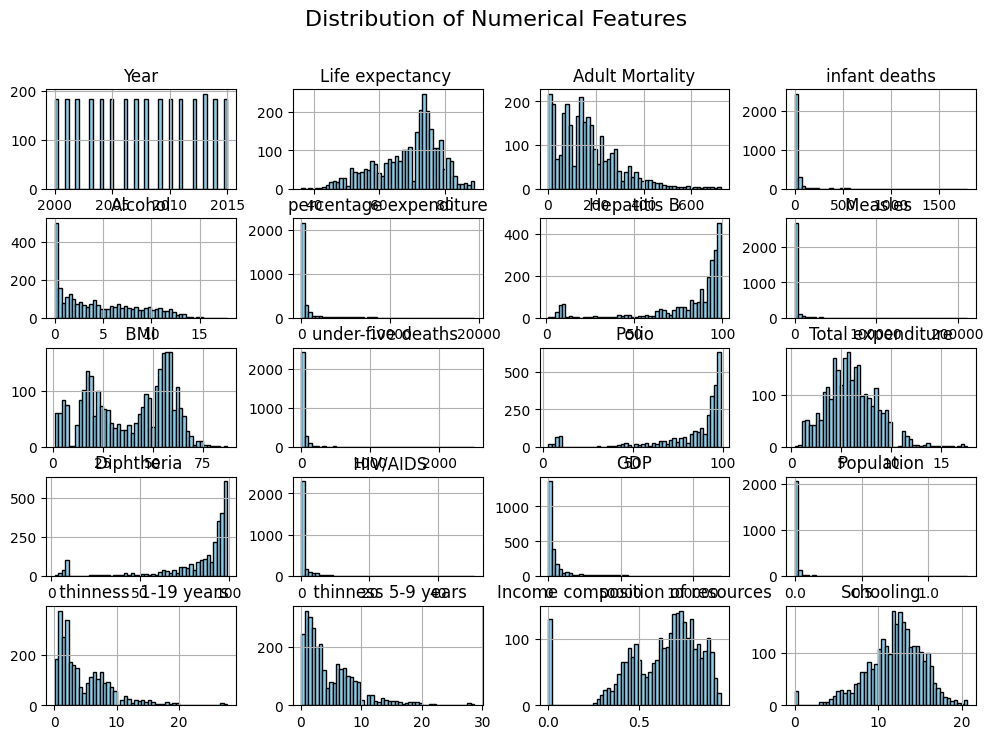

In [43]:
data.hist(bins=50, figsize=(12,8))
plt.show()

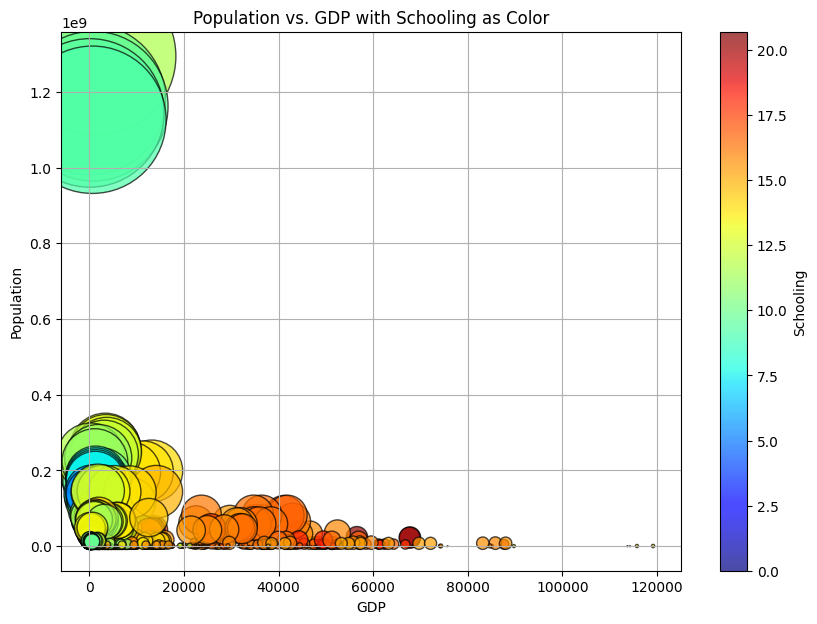

In [109]:
# Scatter plot for visualizing the relationship between GDP and Population
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=data["GDP"],             # Using "GDP" for x-axis
    y=data["Population"],      # Using "Population" for y-axis
    c=data["Schooling"],       # Color by "Schooling"
    cmap="jet",
    s=data["Population"] / 1e5,  # Size proportional to Population
    alpha=0.7,
    edgecolors="k"             # Black edges for points
)
plt.colorbar(scatter, label="Schooling")  # Colorbar for Schooling
plt.xlabel("GDP")
plt.ylabel("Population")
plt.title("Population vs. GDP with Schooling as Color")
plt.grid(True)
plt.show()

In [49]:
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [112]:
# Fill missing values with the median for numerical columns
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].median())

In [113]:
data.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [114]:
data.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [115]:
# Independent variable: Population (predictor)
X = data[["Population"]]  # Independent variable

# Dependent variable: Life expectancy (target)
# Check if the column name is exactly "Life expectancy "
# It might have extra spaces or a typo.
y = data["Life expectancy "]  # Dependent variable


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
lr = LinearRegression()

In [118]:
# Remove rows with NaN values in X_train and corresponding rows in y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep only the y_train values corresponding to the remaining X_train rows

# Now fit the model
lr.fit(X_train.values, y_train)


LinearRegression()

In [119]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [120]:
r2_score( y_test, y_pred)

0.001132812185742349

In [121]:
print(lr.intercept_)

69.3325380850569


In [122]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([69.17183729])

In [123]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [124]:
import pickle

In [125]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [126]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [127]:
X[0:5]

,Population
0,33736494.0
1,327582.0
2,31731688.0
3,3696958.0
4,2978599.0


In [128]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([69.17183729, 69.33097768, 69.181387  , 69.31492795, 69.31834979])

In [129]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  69.242438
650     75.9  69.332536
1740    74.2  69.329604
177     76.8  69.325933
1377    51.9  69.317555


MULTIPLE LINEAR REGRESSION

In [130]:
X = data.drop(columns=["Life expectancy "])  # Independent variables, Add a space to the column name
y = data["Life expectancy "]

In [131]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2938, 21)
Shape of y: (2938,)


In [132]:
X = X.values
y = y.values

In [133]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (2350, 1)
Shape of y: (2350,)


In [145]:
# Add the import statement for mean_squared_error
from sklearn.metrics import mean_squared_error

# Check if the column name is exactly "Life expectancy " (with a space at the end)
# It might have extra spaces or a typo.
# Print the available columns to identify the correct name.
print(data.columns)

# If the column name has a space at the end, use this:
X = pd.get_dummies(data.drop(columns=["Life expectancy "]), drop_first=True)  # Encoding categorical variable
y = data["Life expectancy "]

# If the column name does not have a space at the end, use this:
# X = pd.get_dummies(data.drop(columns=["Life expectancy"]), drop_first=True)  # Encoding categorical variable
# y = data["Life expectancy"]


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate the model
# Now mean_squared_error should be recognized
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Multiple Linear Regression
  Mean Squared Error: 3.6638
  R² Score: 0.9577


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
print(model_multiple.intercept_)


-450.2777556417313


In [148]:
# Assuming 'Country' is the column with 'Afghanistan' and other country names
X = data.drop(columns=["Life expectancy ", "Country"])  # Independent variables, Add a space to the column name
y = data["Life expectancy "]

# ... (rest of your code for data preparation and splitting) ...

# Keep X as a DataFrame for select_dtypes to work:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Before prediction, convert categorical features to numerical using one-hot encoding:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with LinearRegression

# Fit the encoder to the categorical features in your training data
# Replace 'categorical_features_indices' with the indices or names of your categorical columns in X_train
# Now using X_train as a DataFrame:
categorical_features_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]
encoder.fit(X_train.iloc[:, categorical_features_indices])  # Use iloc for DataFrame indexing

# Transform both training and testing data using iloc for DataFrames
X_train_encoded = encoder.transform(X_train.iloc[:, categorical_features_indices])
X_test_encoded = encoder.transform(X_test.iloc[:, categorical_features_indices])

# Get numerical feature indices
numerical_features_indices = [i for i in range(X_train.shape[1]) if i not in categorical_features_indices]

# Combine encoded features with numerical features using NumPy arrays
X_train = np.concatenate([X_train.iloc[:, numerical_features_indices].values, X_train_encoded], axis=1)
X_test = np.concatenate([X_test.iloc[:, numerical_features_indices].values, X_test_encoded], axis=1)


# Now you can fit and predict

In [151]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [152]:
[{"name":"model_multiple","value":"LinearRegression()","type":"LinearRegression"}]

[{'name': 'model_multiple',
  'value': 'LinearRegression()',
  'type': 'LinearRegression'}]

In [153]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

      Actual  Predicted
2546    73.7  70.319217
650     75.9  75.753404
1740    74.2  74.730573
177     76.8  77.413164
1377    51.9  51.410562
